**Importing relevant packages**

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


**Importing the Dataset**

In [7]:
dataset= pd.read_csv('Final Project 1.csv')

**Exploring the dataset**

In [ ]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
print(dataset.shape)

(1599, 12)


In [ ]:
print(dataset.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# Checking for duplicate values in the dataset
duplicate_rows_df = dataset[dataset.duplicated()]
print("Number of duplicate rows:", duplicate_rows_df.shape)

Number of duplicate rows: (240, 12)


In [ ]:
# Removing the duplicate values
dataset = dataset.drop_duplicates()
print(dataset.shape)

(1359, 12)


In [ ]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Exploratory Data Analysis**

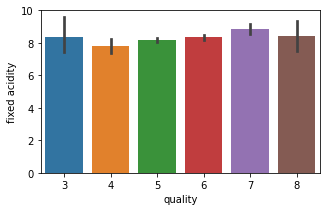

In [ ]:
fig= plt.figure(figsize=(5,3))
sns.barplot(x= 'quality', y='fixed acidity', data= dataset)

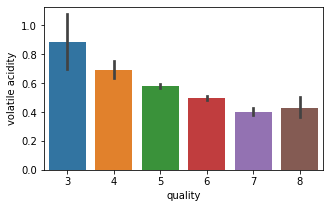

In [ ]:
fig = plt.figure(figsize= (5,3))
sns.barplot(x= 'quality', y='volatile acidity', data=dataset)
# Here we see that higher qualit wine has lower bolatile acidity

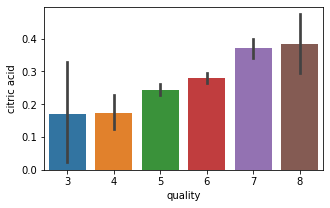

In [ ]:
fig= plt.figure(figsize=(5,3))
sns.barplot(x='quality', y='citric acid', data = dataset)
#Composition of citric acid go higher as we go higher in the quality of the wine

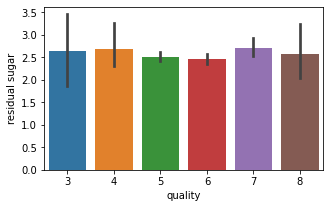

In [ ]:
fig= plt.figure(figsize=(5,3))
sns.barplot(x='quality',y='residual sugar', data= dataset)
# Residual Sugar does not have a significant effect on the quality of wine

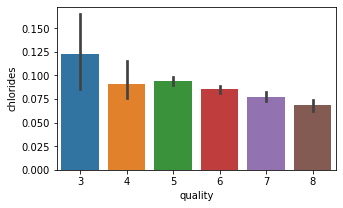

In [ ]:
fig = plt.figure(figsize= (5,3))
sns.barplot(x= 'quality', y= 'chlorides', data =dataset)
# Composition of chloride also go down as we go higher in the quality of wine

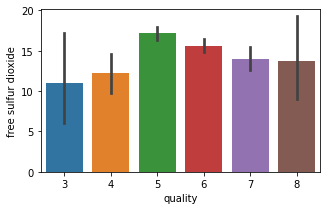

In [ ]:
fig = plt.figure(figsize= (5,3))
sns.barplot(x= 'quality', y= 'free sulfur dioxide', data =dataset)

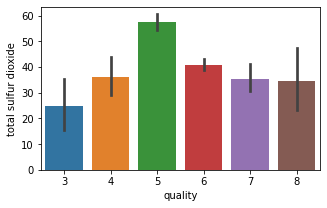

In [ ]:
fig = plt.figure(figsize= (5,3))
sns.barplot(x= 'quality', y= 'total sulfur dioxide', data =dataset)

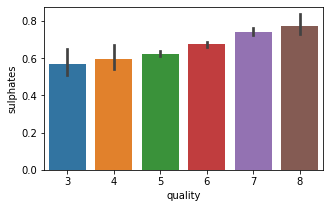

In [ ]:
fig = plt.figure(figsize= (5,3))
sns.barplot(x= 'quality', y= 'sulphates', data =dataset)
# Sulphates level goes higher with the quality of wine

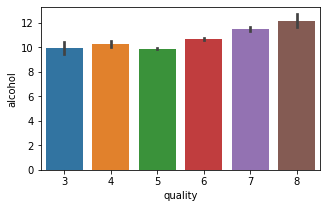

In [ ]:
fig = plt.figure(figsize= (5,3))
sns.barplot(x= 'quality', y= 'alcohol', data =dataset)
# Alcohol level also goes higher as the quality of wine increases

**Heatmap**

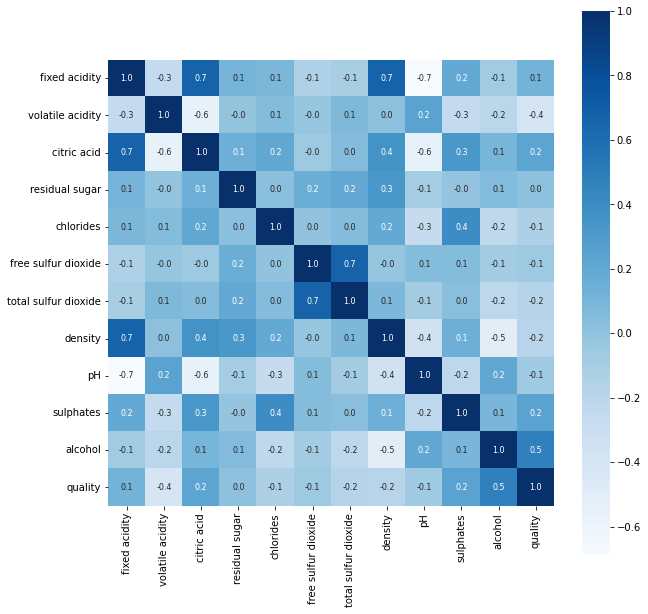

In [ ]:
plt.subplots(figsize=(10,10))
sns.heatmap(dataset.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8},cmap='Blues')

In [ ]:
print(dataset['quality'].value_counts())

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64


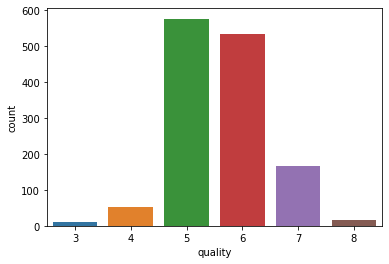

In [ ]:
sns.countplot(x=dataset['quality'])

In [ ]:
def cat(x):
  if x<6.5:
    return 'poor'
  else:
      return 'good'
dataset['quality']=dataset['quality'].apply(lambda x:cat(x))
# Assuming that if the quality is below 6 it is not up to the quality of wine  
  

In [ ]:
print(dataset['quality'].value_counts())

poor    1175
good     184
Name: quality, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


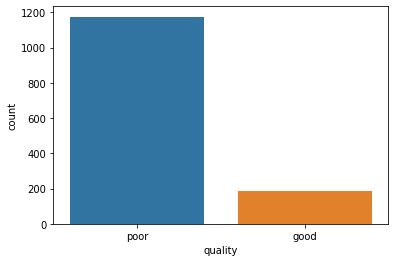

In [ ]:
sns.countplot(dataset['quality'])

In [ ]:
# Now lets assign a labels to our quality variable
label_quality = LabelEncoder()
# Poor becomes 1 and good become 0
dataset['quality']= label_quality.fit_transform(dataset['quality'])

In [ ]:
print(dataset['quality'].value_counts())

1    1175
0     184
Name: quality, dtype: int64


In [8]:
# Extracting independent and depent variables
x= dataset.drop(['quality'],axis=1)
y= dataset['quality']

**Feature Scaling**

In [9]:
sc= StandardScaler()
x=sc.fit_transform(x)

**Splitting the dataset into train and test**

In [10]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape)

(1279, 11) (320, 11)


**Creating a function to apply different classification models**

In [11]:
def fit_predict(model1):
  model = model1
  model.fit(x_train, y_train)
  y_pred=model.predict(x_test)
  print("Accuracy score: ",(accuracy_score(y_test, y_pred)*100))
  print("\nConfusion Matirx")
  print(confusion_matrix(y_test, y_pred))
  print("\nClassification report")
  print(classification_report(y_test, y_pred))

**Logistics Regression**

In [12]:
from sklearn.linear_model import LogisticRegression
fit_predict(LogisticRegression())

Accuracy score:  57.49999999999999

Confusion Matirx
[[ 0  0  1  0  0  0]
 [ 0  1  7  2  0  0]
 [ 0  0 98 32  0  0]
 [ 0  0 46 76 10  0]
 [ 0  0  3 30  9  0]
 [ 0  0  0  1  4  0]]

Classification report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.10      0.18        10
           5       0.63      0.75      0.69       130
           6       0.54      0.58      0.56       132
           7       0.39      0.21      0.28        42
           8       0.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.43      0.27      0.28       320
weighted avg       0.56      0.57      0.55       320



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**KNN**

In [13]:
from sklearn.neighbors import KNeighborsClassifier
fit_predict(KNeighborsClassifier(n_neighbors=7))

Accuracy score:  55.3125

Confusion Matirx
[[ 0  0  0  1  0  0]
 [ 0  0  4  6  0  0]
 [ 0  1 86 42  1  0]
 [ 0  2 44 76 10  0]
 [ 0  0  5 22 15  0]
 [ 0  0  0  1  4  0]]

Classification report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.62      0.66      0.64       130
           6       0.51      0.58      0.54       132
           7       0.50      0.36      0.42        42
           8       0.00      0.00      0.00         5

    accuracy                           0.55       320
   macro avg       0.27      0.27      0.27       320
weighted avg       0.53      0.55      0.54       320



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Decision Tree**

In [15]:
from sklearn.tree import DecisionTreeClassifier
fit_predict(DecisionTreeClassifier(max_depth=2))

Accuracy score:  53.125

Confusion Matirx
[[  0   0   1   0   0   0]
 [  0   0   7   3   0   0]
 [  0   0 110  20   0   0]
 [  0   0  72  60   0   0]
 [  0   0   7  35   0   0]
 [  0   0   0   5   0   0]]

Classification report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.56      0.85      0.67       130
           6       0.49      0.45      0.47       132
           7       0.00      0.00      0.00        42
           8       0.00      0.00      0.00         5

    accuracy                           0.53       320
   macro avg       0.17      0.22      0.19       320
weighted avg       0.43      0.53      0.47       320



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Random Forest**

In [16]:
from sklearn.ensemble import RandomForestClassifier
fit_predict(RandomForestClassifier(n_estimators=200, random_state=0))

Accuracy score:  66.5625

Confusion Matirx
[[  0   0   1   0   0   0]
 [  0   0   6   4   0   0]
 [  0   0 100  29   1   0]
 [  0   0  31  93   8   0]
 [  0   0   0  21  20   1]
 [  0   0   0   0   5   0]]

Classification report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.72      0.77      0.75       130
           6       0.63      0.70      0.67       132
           7       0.59      0.48      0.53        42
           8       0.00      0.00      0.00         5

    accuracy                           0.67       320
   macro avg       0.32      0.32      0.32       320
weighted avg       0.63      0.67      0.65       320



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Support Vector Classifier**

In [17]:
from sklearn.svm import SVC
fit_predict(SVC())

Accuracy score:  60.3125

Confusion Matirx
[[ 0  0  1  0  0  0]
 [ 0  0  8  2  0  0]
 [ 0  0 99 31  0  0]
 [ 0  0 43 85  4  0]
 [ 0  0  1 32  9  0]
 [ 0  0  0  2  3  0]]

Classification report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.65      0.76      0.70       130
           6       0.56      0.64      0.60       132
           7       0.56      0.21      0.31        42
           8       0.00      0.00      0.00         5

    accuracy                           0.60       320
   macro avg       0.30      0.27      0.27       320
weighted avg       0.57      0.60      0.57       320



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Creating a test case**

In [20]:
model = SVC()
model.fit(x_train, y_train)
test_case_list=[7.4, 0.36, 0.3, 1.8, 0.074, 17, 24, 0.99419, 3.24, 0.7, 13.4]
#creating a list of random values for chemical compositions of wine

test_case_df = pd.DataFrame(test_case_list)
test_case = test_case_df.T
test_case_scaled= sc.transform(test_case)
test_case_prediction = model.predict(test_case_scaled)
if(test_case_prediction == 0):
      print('The Quality of wine is good.')
else:
      print('The Qualit of wine is not up to the mark.')

The Qualit of wine is not up to the mark.


Name : Shailesh Bourai